# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [160]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [162]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [163]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [164]:
spaceship_cleaned=spaceship.dropna()

In [165]:
spaceship_cleaned
spaceship_cleaned[(spaceship_cleaned != 0).all(axis=1)]
spaceship_cleaned

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [166]:
mask = (spaceship_cleaned.applymap(lambda x: isinstance(x, float) and x == 0.0))
mask

C:\Users\ostor\AppData\Local\Temp\ipykernel_16336\2687826897.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = (spaceship_cleaned.applymap(lambda x: isinstance(x, float) and x == 0.0))


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,True,False,True,False,False,False,False
8689,False,False,False,False,False,False,False,True,True,True,True,True,False,False
8690,False,False,False,False,False,False,False,True,True,False,False,True,False,False
8691,False,False,False,False,False,False,False,True,False,True,False,False,False,False


In [167]:
spaceship_cleaned_2 = spaceship_cleaned[~mask.any(axis=1)]
spaceship_cleaned_2
spaceship_cleaned_3 = spaceship_cleaned_2.reset_index(drop=True)
spaceship_cleaned_3

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
1,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
2,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True
3,0011_01,Earth,False,F/2/P,TRAPPIST-1e,28.0,False,8.0,974.0,12.0,2.0,7.0,Elle Bertsontry,True
4,0056_03,Europa,False,A/1/S,TRAPPIST-1e,27.0,False,279.0,605.0,3374.0,286.0,3.0,Zinoces Tractive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,9196_02,Europa,False,C/339/S,TRAPPIST-1e,31.0,False,1.0,104.0,1338.0,698.0,126.0,Majorab Poustive,True
211,9196_03,Europa,False,C/339/S,TRAPPIST-1e,23.0,False,381.0,794.0,52.0,654.0,1317.0,Chellus Poustive,False
212,9202_01,Europa,False,C/309/P,TRAPPIST-1e,26.0,False,8586.0,77.0,114.0,29.0,4.0,Alark Eguing,False
213,9234_01,Earth,False,G/1500/P,TRAPPIST-1e,49.0,False,6.0,1.0,638.0,1107.0,23.0,Catha Bushins,False


In [168]:
spaceship_cleaned_3.nunique()

PassengerId     215
HomePlanet        3
CryoSleep         1
Cabin           210
Destination       3
Age              49
VIP               2
RoomService     157
FoodCourt       181
ShoppingMall    147
Spa             158
VRDeck          157
Name            215
Transported       2
dtype: int64

In [169]:
spaceship_cleaned_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   215 non-null    object 
 1   HomePlanet    215 non-null    object 
 2   CryoSleep     215 non-null    object 
 3   Cabin         215 non-null    object 
 4   Destination   215 non-null    object 
 5   Age           215 non-null    float64
 6   VIP           215 non-null    object 
 7   RoomService   215 non-null    float64
 8   FoodCourt     215 non-null    float64
 9   ShoppingMall  215 non-null    float64
 10  Spa           215 non-null    float64
 11  VRDeck        215 non-null    float64
 12  Name          215 non-null    object 
 13  Transported   215 non-null    bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 22.2+ KB


In [170]:
spaceship_cleaned_3

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
1,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
2,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True
3,0011_01,Earth,False,F/2/P,TRAPPIST-1e,28.0,False,8.0,974.0,12.0,2.0,7.0,Elle Bertsontry,True
4,0056_03,Europa,False,A/1/S,TRAPPIST-1e,27.0,False,279.0,605.0,3374.0,286.0,3.0,Zinoces Tractive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,9196_02,Europa,False,C/339/S,TRAPPIST-1e,31.0,False,1.0,104.0,1338.0,698.0,126.0,Majorab Poustive,True
211,9196_03,Europa,False,C/339/S,TRAPPIST-1e,23.0,False,381.0,794.0,52.0,654.0,1317.0,Chellus Poustive,False
212,9202_01,Europa,False,C/309/P,TRAPPIST-1e,26.0,False,8586.0,77.0,114.0,29.0,4.0,Alark Eguing,False
213,9234_01,Earth,False,G/1500/P,TRAPPIST-1e,49.0,False,6.0,1.0,638.0,1107.0,23.0,Catha Bushins,False


In [171]:
import pandas as pd

# Define the mapping for each categorical column
home_planet_mapping = {value: idx for idx, value in enumerate(spaceship_cleaned_3['HomePlanet'].unique())}
destination_mapping = {value: idx for idx, value in enumerate(spaceship_cleaned_3['Destination'].unique())}
vip_mapping = {value: idx for idx, value in enumerate(spaceship_cleaned_3['VIP'].unique())}

# Apply the mapping
spaceship_cleaned_3['HomePlanet'] = spaceship_cleaned_3['HomePlanet'].map(home_planet_mapping)
spaceship_cleaned_3['Destination'] = spaceship_cleaned_3['Destination'].map(destination_mapping)
spaceship_cleaned_3['VIP'] = spaceship_cleaned_3['VIP'].map(vip_mapping)

spaceship_cleaned_3


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0002_01,0,False,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
1,0004_01,0,False,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
2,0008_03,1,False,B/1/P,1,45.0,0,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True
3,0011_01,0,False,F/2/P,0,28.0,0,8.0,974.0,12.0,2.0,7.0,Elle Bertsontry,True
4,0056_03,1,False,A/1/S,0,27.0,0,279.0,605.0,3374.0,286.0,3.0,Zinoces Tractive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,9196_02,1,False,C/339/S,0,31.0,0,1.0,104.0,1338.0,698.0,126.0,Majorab Poustive,True
211,9196_03,1,False,C/339/S,0,23.0,0,381.0,794.0,52.0,654.0,1317.0,Chellus Poustive,False
212,9202_01,1,False,C/309/P,0,26.0,0,8586.0,77.0,114.0,29.0,4.0,Alark Eguing,False
213,9234_01,0,False,G/1500/P,0,49.0,0,6.0,1.0,638.0,1107.0,23.0,Catha Bushins,False


In [172]:
spaceship_cleaned_3['Transported'] = spaceship_cleaned_3['Transported'].astype(str)

**Check the shape of your data**

c:\Users\ostor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ostor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ostor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ostor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

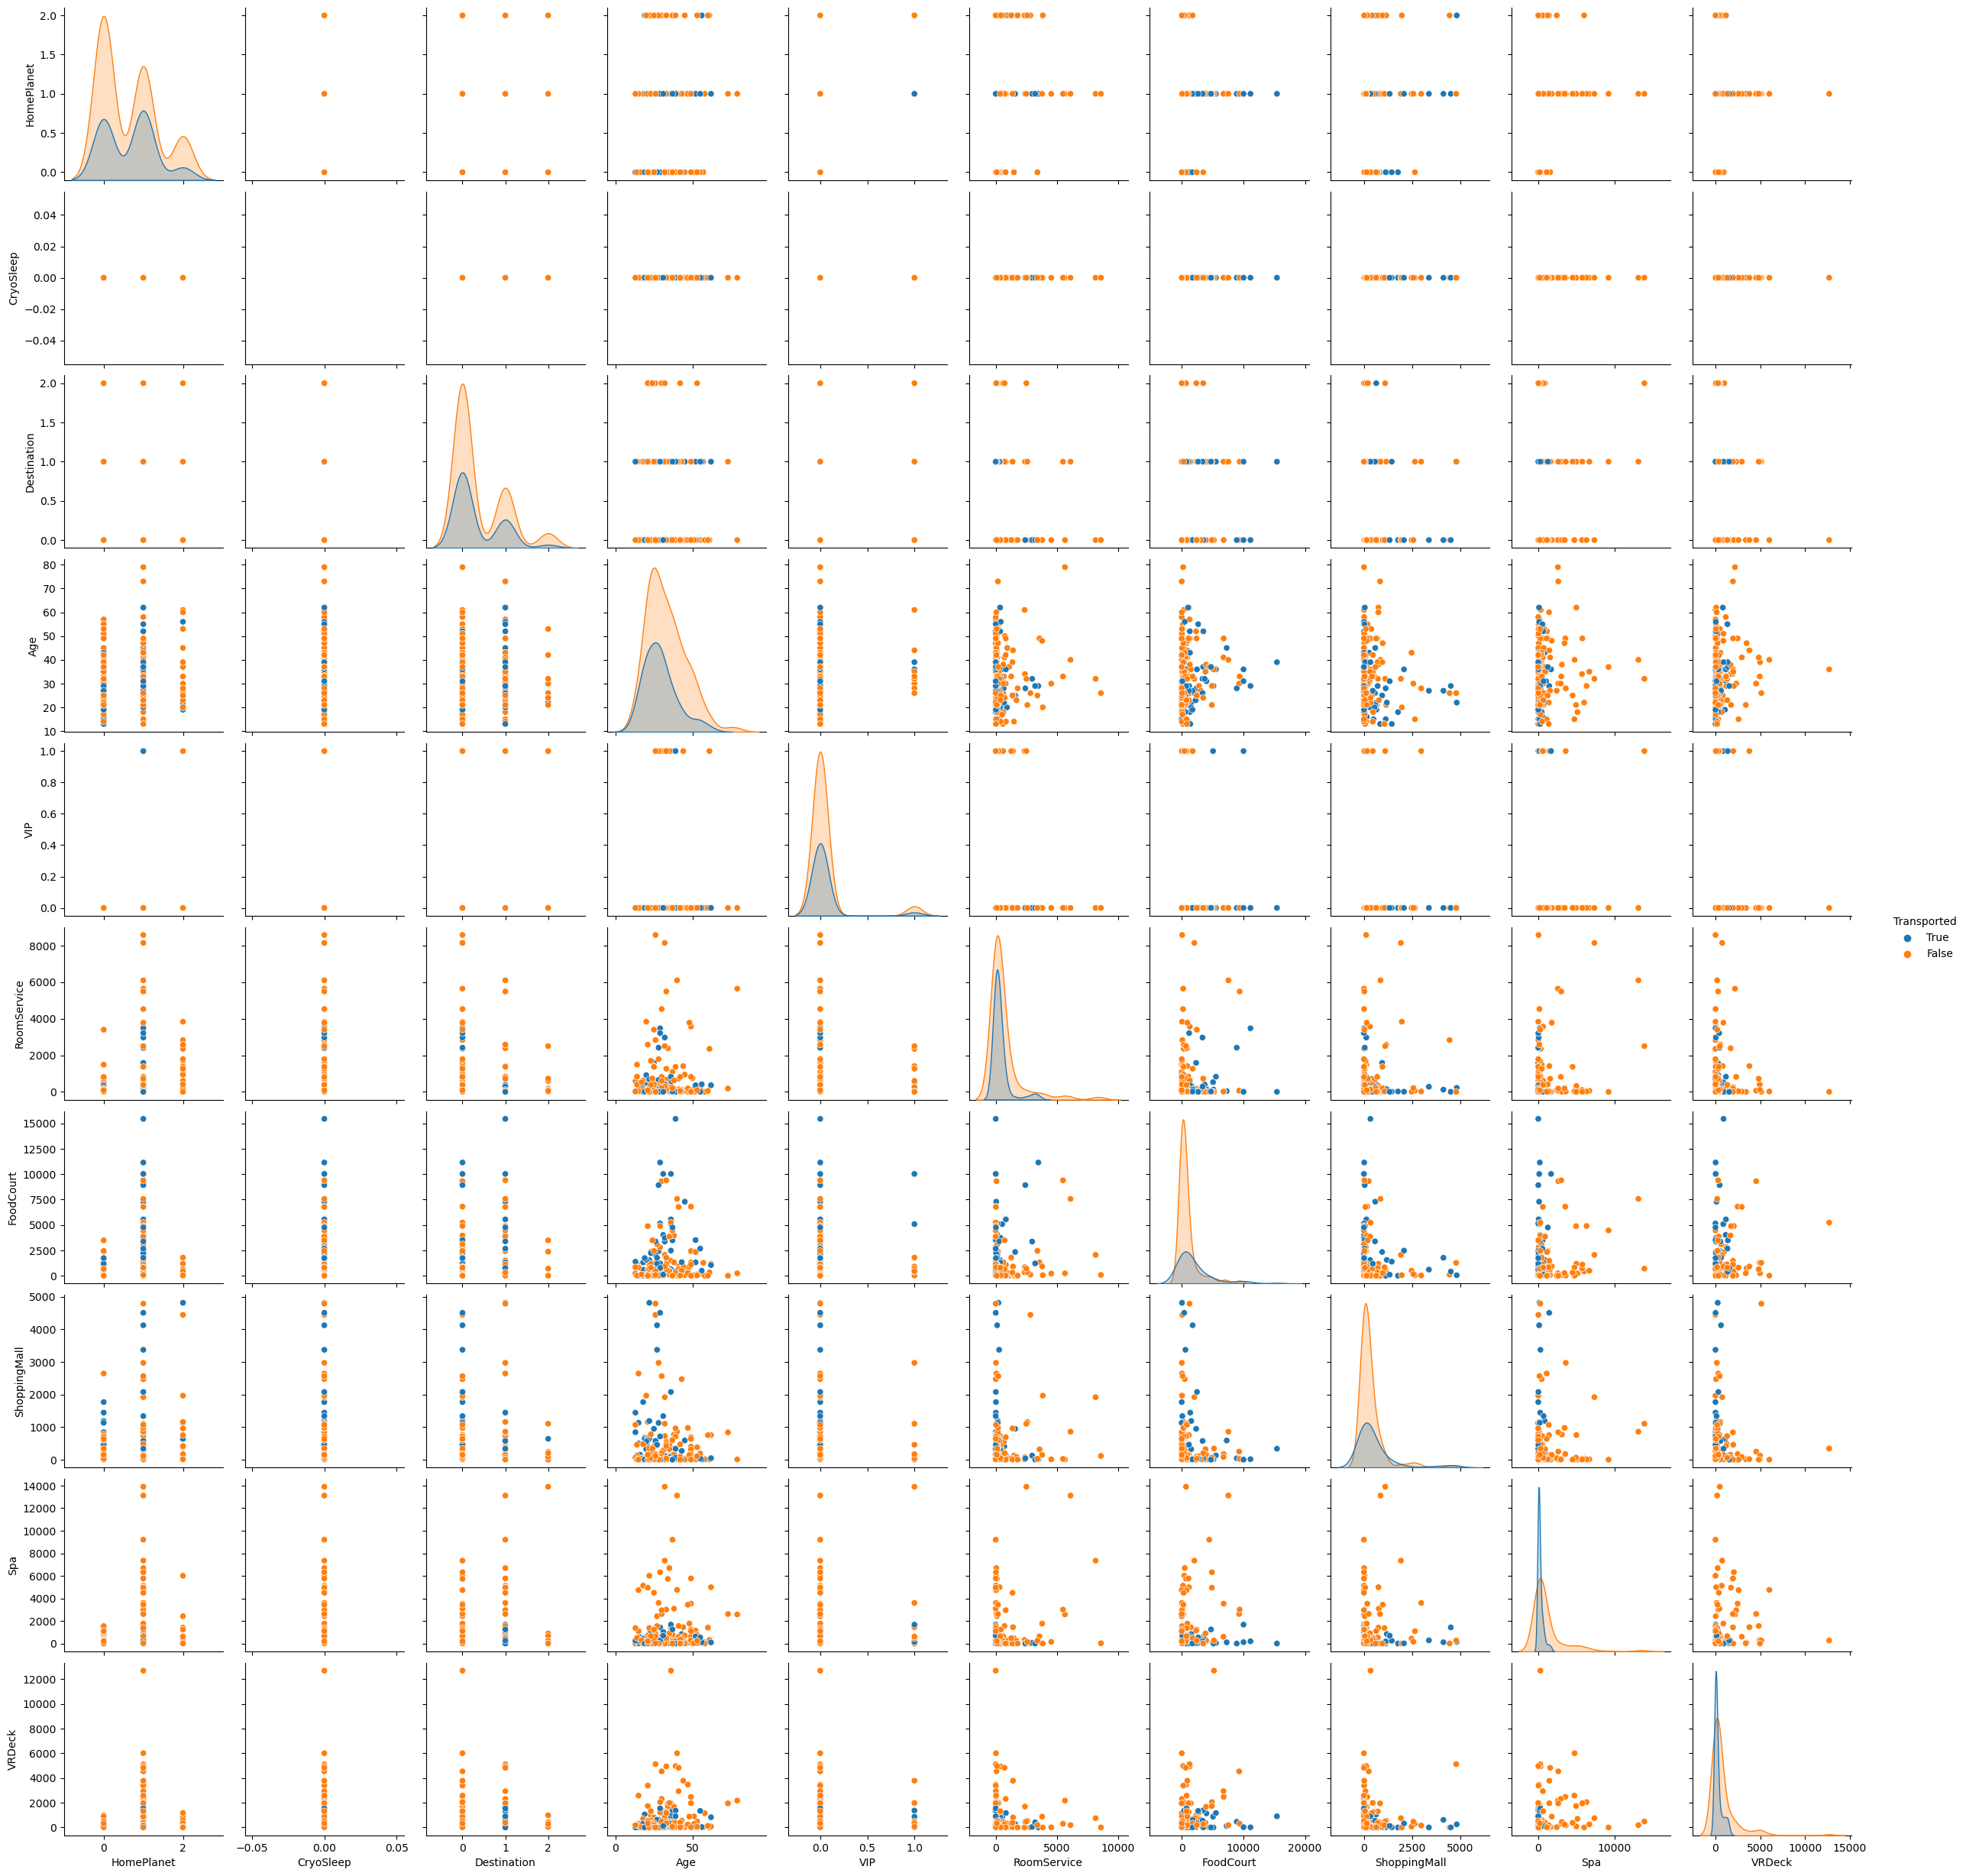

In [173]:
sns.pairplot(spaceship_cleaned_3, hue="Transported")
plt.show()

In [174]:
numeric_spaceship = spaceship_cleaned_3.select_dtypes(include=['number'])

features = numeric_spaceship.drop(columns=["Transported"], errors='ignore')

target = spaceship_cleaned_3["Transported"]

In [175]:
features

,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0
1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0
2,1,1,45.0,0,39.0,7295.0,589.0,110.0,124.0
3,0,0,28.0,0,8.0,974.0,12.0,2.0,7.0
4,1,0,27.0,0,279.0,605.0,3374.0,286.0,3.0
...,...,...,...,...,...,...,...,...,...
210,1,0,31.0,0,1.0,104.0,1338.0,698.0,126.0
211,1,0,23.0,0,381.0,794.0,52.0,654.0,1317.0
212,1,0,26.0,0,8586.0,77.0,114.0,29.0,4.0
213,0,0,49.0,0,6.0,1.0,638.0,1107.0,23.0


In [176]:
target

0       True
1       True
2       True
3       True
4       True
       ...  
210     True
211    False
212    False
213    False
214    False
Name: Transported, Length: 215, dtype: object

**Check for data types**

In [177]:
#your code here

**Check for missing values**

In [178]:
#your code here

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [179]:
#your code here

**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [180]:
#your code here

And also lets define our target.

In [181]:
#your code here

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [182]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [183]:
X_test

,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
198,1,1,25.0,0,1369.0,310.0,3.0,4502.0,377.0
37,0,0,14.0,0,1489.0,2.0,126.0,460.0,72.0
89,1,0,29.0,0,3478.0,11153.0,15.0,203.0,15.0
168,1,0,33.0,0,81.0,1125.0,481.0,505.0,1261.0
171,1,1,55.0,0,1.0,2670.0,34.0,542.0,1339.0
75,2,0,20.0,0,915.0,12.0,25.0,205.0,311.0
96,1,1,26.0,0,1.0,1269.0,4790.0,270.0,5116.0
137,0,0,51.0,0,152.0,55.0,25.0,74.0,289.0
5,0,0,22.0,0,45.0,1096.0,148.0,1377.0,1.0
83,0,0,18.0,0,622.0,53.0,8.0,47.0,39.0


In [184]:
X_train

,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
16,1,0,79.0,0,5649.0,235.0,7.0,2579.0,2175.0
135,1,0,35.0,1,247.0,436.0,459.0,1.0,1984.0
122,1,1,36.0,1,1.0,10029.0,1.0,1679.0,27.0
22,1,0,36.0,1,530.0,5085.0,1.0,146.0,872.0
80,2,2,22.0,0,193.0,1.0,640.0,15.0,30.0
...,...,...,...,...,...,...,...,...,...
67,0,0,35.0,0,198.0,44.0,97.0,30.0,510.0
192,0,2,21.0,0,4.0,3.0,149.0,17.0,442.0
117,0,0,43.0,0,63.0,1339.0,9.0,253.0,42.0
47,0,0,24.0,0,3.0,361.0,94.0,824.0,160.0


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [185]:
y_train

16     False
135    False
122     True
22      True
80      True
       ...  
67     False
192    False
117     True
47     False
172    False
Name: Transported, Length: 172, dtype: object

In [186]:
y_test

198    False
37     False
89      True
168    False
171     True
75      True
96     False
137    False
5      False
83     False
55      True
145    False
160    False
112     True
74      True
203    False
126    False
12     False
153    False
158     True
169    False
141     True
209    False
190    False
144    False
18     False
185     True
15     False
86      True
71      True
7      False
63     False
143    False
97      True
136    False
162     True
33      True
154    False
90     False
211    False
106    False
181    False
139     True
Name: Transported, dtype: object

Fit the model to your data.

In [187]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [188]:
pred = knn.predict(X_test)
pred

array(['False', 'False', 'True', 'False', 'False', 'False', 'False',
       'False', 'False', 'True', 'False', 'False', 'True', 'True',
       'False', 'False', 'False', 'False', 'False', 'True', 'False',
       'False', 'False', 'True', 'True', 'False', 'True', 'False', 'True',
       'True', 'False', 'False', 'False', 'False', 'False', 'True',
       'False', 'False', 'True', 'False', 'False', 'False', 'True'],
      dtype=object)

In [189]:
y_test.values

array(['False', 'False', 'True', 'False', 'True', 'True', 'False',
       'False', 'False', 'False', 'True', 'False', 'False', 'True',
       'True', 'False', 'False', 'False', 'False', 'True', 'False',
       'True', 'False', 'False', 'False', 'False', 'True', 'False',
       'True', 'True', 'False', 'False', 'False', 'True', 'False', 'True',
       'True', 'False', 'False', 'False', 'False', 'False', 'True'],
      dtype=object)

In [190]:
knn.score(X_test, y_test)

0.7209302325581395

Evaluate your model.

In [191]:
#your code here

**Congratulations, you have just developed your first Machine Learning model!**